https://www.kaggle.com/kushagrakinjawadekar/loan-data-exploration-and-prediction

In [1]:
# import packages
import os
import pandas as pd
import numpy as np

In [2]:
# import data
data = pd.read_csv("C:\\Users\\Roma\\Downloads\\KAGGLE\\5.Loan Prediction\\train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
Categorical = data.select_dtypes(include=[np.object])
print("Categorical features in data :", Categorical.shape[1])

Numerical = data.select_dtypes(include=[np.number])
print("Numerical features in data :", Numerical.shape[1])

Categorical features in data : 8
Numerical features in data : 5


# UNIVARIATE ANALYSIS

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Male applicants are higher than Female applicants.

In [8]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Out of all the applicants, more than 60% are married.

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

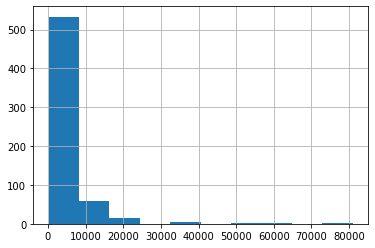

In [17]:
data['ApplicantIncome'].hist(bins=10);

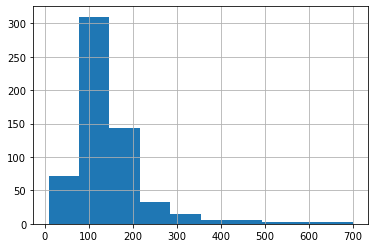

In [18]:
data['LoanAmount'].hist(bins=10);

In [19]:
# Missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# Percentage of missing values

data.isnull().sum()/data.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [22]:
# Descriptive Statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Exploratory Data Analysis

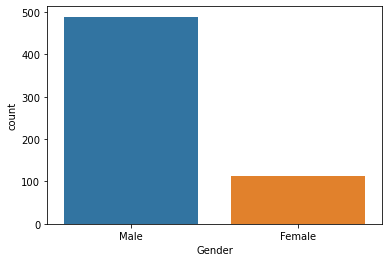

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data.Gender)

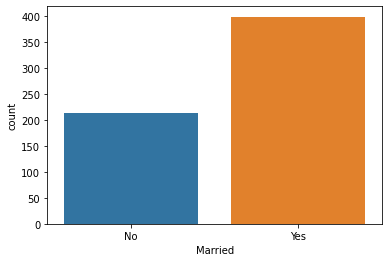

In [25]:
sns.countplot(data.Married)

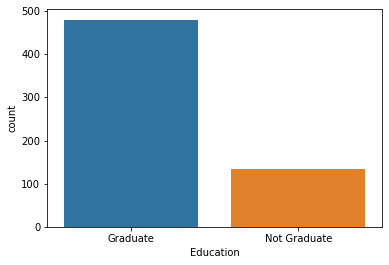

In [28]:
sns.countplot(data.Education)

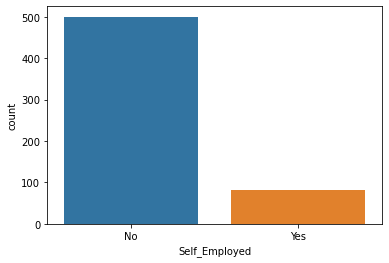

In [29]:
sns.countplot(data.Self_Employed)

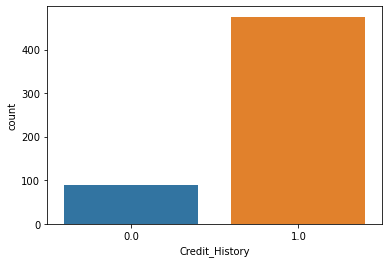

In [33]:
sns.countplot(data.Credit_History)

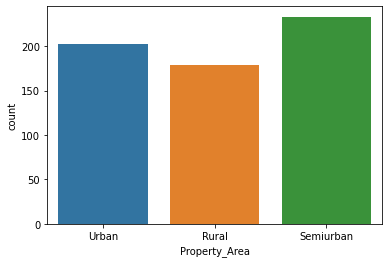

In [34]:
sns.countplot(data.Property_Area)

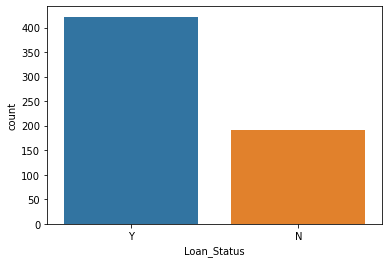

In [35]:
sns.countplot(data.Loan_Status)

In [1]:
###         CONCLUSION FROM THE PLOTS

#    Male applicants are higher than Female applicants.
#    Majority of the applicants are married.
#    80% of the applicants are Graduated.
#    80% of the applicants are not Self employed.
#    Seeing the Credit History, more than 80% of the applicants were approved of the loan in the past.
#    Maximum applicants had SemiUrban Property.
#    The loan has been approved for more than 50% of the applicants.

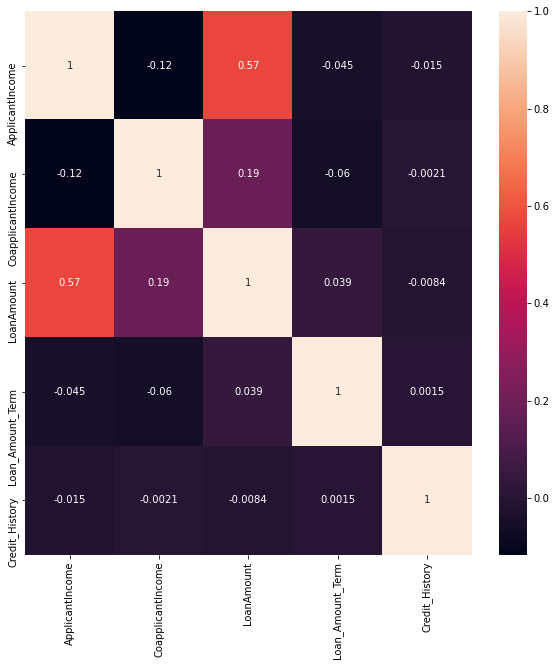

In [38]:
# CORRELATION PLOT
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [39]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# BIVARIATE ANALYSIS

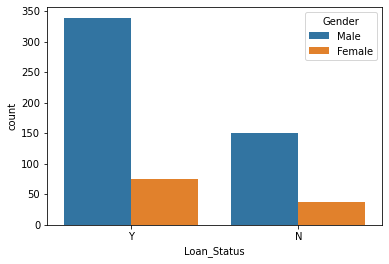

In [43]:
sns.countplot('Loan_Status', hue='Gender', data = data)

A large no. of applicants who have been approved of loan are Males

In [51]:
# Most probably after looking through the graph we are going to fill with mode of the data i.e 'Male'

data['Gender'] = data['Gender'].fillna('Male')

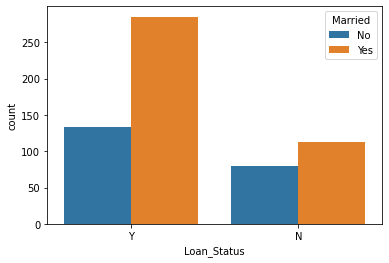

In [44]:
sns.countplot('Loan_Status', hue = 'Married', data = data)

Mpst of the applicants who have been approved of the loan are married.

In [52]:
# We can infer from this that those who were married were most probably to get the loan.

data['Married'] = data['Married'].fillna('Yes')

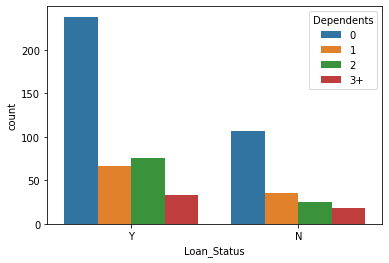

In [54]:
sns.countplot('Loan_Status', hue = 'Dependents', data = data)

In [55]:
# Since most of the dependents are 0 we are gonna fill with it with 0

data['Dependents'] = data['Dependents'].fillna('0')

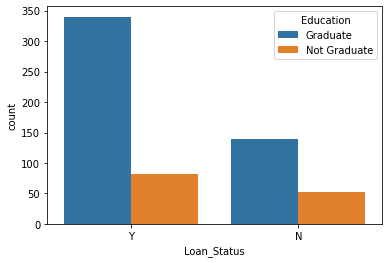

In [45]:
sns.countplot('Loan_Status', hue = 'Education', data = data)

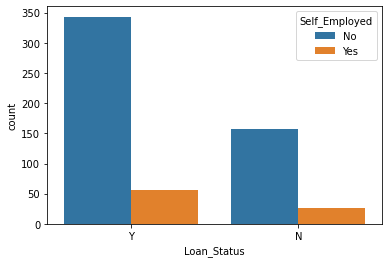

In [46]:
sns.countplot('Loan_Status', hue = 'Self_Employed', data = data)

In [56]:
data['Self_Employed'] = data['Self_Employed'].fillna('Yes')

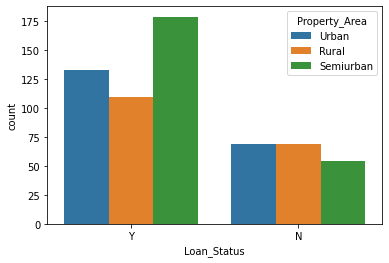

In [48]:
sns.countplot('Loan_Status', hue = 'Property_Area', data = data)

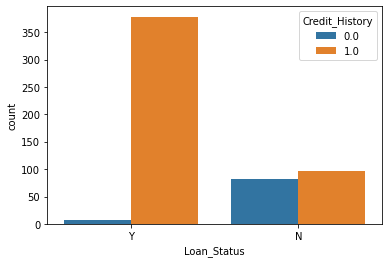

In [49]:
sns.countplot('Loan_Status', hue = 'Credit_History', data = data)

In [65]:
# Mode
data['Credit_History'].fillna(data['Credit_History'].value_counts().idxmax(), inplace=True)

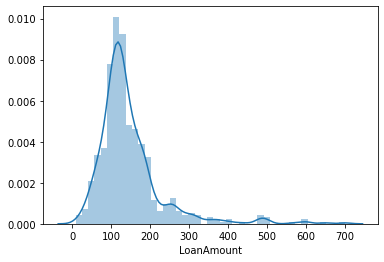

In [58]:
sns.distplot(data['LoanAmount'])

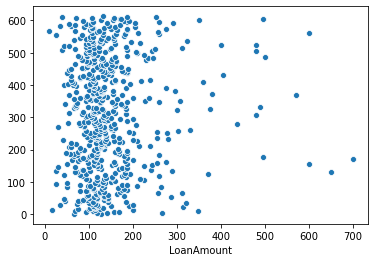

In [59]:
sns.scatterplot(data['LoanAmount'],y=np.arange(0,614))


In [61]:
# We see outliers as data seems to right skewed , so we will not fill values by mean of this data, we gonna take the mean without containing outliers.

mean=data[data['LoanAmount']<=400]['LoanAmount'].mean()
data['LoanAmount'].fillna(mean,inplace=True)

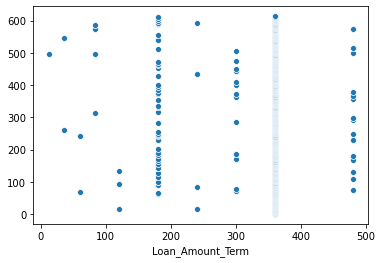

In [62]:
sns.scatterplot(data['Loan_Amount_Term'],y=np.arange(0,614))

In [63]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)

In [66]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# ENCODING

In [67]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df = data.copy()

In [69]:
data['Gender'] = lb.fit_transform(data['Gender'])
data['Married'] = lb.fit_transform(data['Married'])
data['Education'] = lb.fit_transform(data['Education'])
data['Self_Employed'] = lb.fit_transform(data['Self_Employed'])
data['Property_Area'] = lb.fit_transform(data['Property_Area'])
data['Loan_Status'] = lb.fit_transform(data['Loan_Status'])
data['Dependents'] = lb.fit_transform(data['Dependents'])

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std = StandardScaler()

In [77]:
# Scaling the data
unscaled_features = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
scaled_features = std.fit_transform(unscaled_features)
scaled_features = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,137.186851,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [78]:
# Segregating the Independent & Dependent features
X = data.drop(['Loan_ID','Loan_Status'],axis=1)
y = data['Loan_Status']

In [79]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lgt = LogisticRegression()
lgt.fit(X_train,y_train)
predict = lgt.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

